In [1]:
from google.colab import drive
drive.mount('gdrive')

%cd '/content/gdrive/My Drive/Project/MUSH_IMG/try_3/'

Mounted at gdrive
/content/gdrive/My Drive/Project/MUSH_IMG/try_3


In [2]:
!pip install ipython-autotime
%load_ext autotime

time: 167 µs (started: 2021-03-04 01:40:17 +00:00)


In [3]:
import os
print(os.listdir('/content/gdrive/My Drive/Project/MUSH_IMG/try_3/'))

['노란다발버섯', '노란싸리버섯', '노루궁뎅이버섯', '달걀버섯', '뽕나무버섯', '붉은싸리버섯', '싸리버섯', '혈색무당버섯', '개나리광대버섯', '표고버섯', '노란꼭지버섯', '곰보버섯']
time: 1.3 ms (started: 2021-03-04 01:40:17 +00:00)


In [4]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

time: 1.73 ms (started: 2021-03-04 01:40:17 +00:00)


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

time: 561 ms (started: 2021-03-04 01:40:17 +00:00)


In [6]:
#display 설정
%matplotlib inline
style.use('fivethirtyeight')
sns.set(style='whitegrid', color_codes=True)

time: 4.39 ms (started: 2021-03-04 01:40:18 +00:00)


In [7]:
#모델 선택
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

time: 141 ms (started: 2021-03-04 01:40:18 +00:00)


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Activation, Dense, Input
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *

time: 1.37 s (started: 2021-03-04 01:40:18 +00:00)


In [9]:
# 이미지 전처리
from keras.preprocessing.image import ImageDataGenerator

time: 32.5 ms (started: 2021-03-04 01:40:19 +00:00)


In [10]:
#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

time: 3.6 ms (started: 2021-03-04 01:40:19 +00:00)


In [11]:
# CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Activation, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import *

import tensorflow as tf
import random as rn

time: 4.45 ms (started: 2021-03-04 01:40:19 +00:00)


In [12]:
#이미지의 픽셀의 numpy array 얻기
import cv2                  
import numpy as np  
from tqdm import tqdm # 진행률표시바
import os   #파일 불러오기                
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

time: 585 ms (started: 2021-03-04 01:40:19 +00:00)


In [13]:
vgg16 = VGG16(weights='imagenet',
              input_shape=(150, 150, 3), include_top=False)

58892288/58889256 [==============================] - 1s 0us/step
time: 6.52 s (started: 2021-03-04 01:40:20 +00:00)


In [14]:
model = Sequential()
model.add(vgg16)

model.add(Flatten())
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(12, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 12)                3084      
Total params: 16,816,204
Trainable params: 16,815,692
Non-trainable params: 512
__________________________________________

****************전처리*********************


In [16]:
# 버섯 사이즈 설정 & 이미지 불러오기

X=[]
Z=[]
IMG_SIZE=150

MUSH_1_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/뽕나무버섯'
MUSH_2_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/노란싸리버섯'
MUSH_3_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/붉은싸리버섯'
MUSH_4_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/싸리버섯'
MUSH_5_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/노란꼭지버섯'
MUSH_6_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/노란다발버섯'
MUSH_7_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/달걀버섯'
MUSH_8_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/곰보버섯'
MUSH_9_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/개나리광대버섯'
MUSH_10_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/혈색무당버섯'
MUSH_11_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/표고버섯'
MUSH_12_DIR='/content/gdrive/My Drive/Project/MUSH_IMG/try_3/노루궁뎅이버섯'

time: 13.9 ms (started: 2021-03-04 01:40:26 +00:00)


In [17]:
def assign_label(img, mushroom_type):
  return mushroom_type

time: 1.09 ms (started: 2021-03-04 01:40:26 +00:00)


In [18]:
def make_train_data(mushroom_type,DIR):
  for img in tqdm(os.listdir(DIR)):
    label = assign_label(img,mushroom_type)
    path = os.path.join(DIR,img) # 기존의 경로와 새로운 경로를 합쳐 하위 경로 만듦
    img = cv2.imread(path,cv2.IMREAD_COLOR) # cv2.imread(이미지 경로, 파일 읽을 때 옵션)
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE)) #cv2.resize(조절할 이미지, 이미지크기)
    
    X.append(np.array(img))
    Z.append(str(label))

time: 17.4 ms (started: 2021-03-04 01:40:26 +00:00)


In [19]:
make_train_data('뽕나무버섯', MUSH_1_DIR)
print(len(X))

100%|██████████| 166/166 [00:33<00:00,  4.90it/s]

166
time: 33.9 s (started: 2021-03-04 01:40:26 +00:00)


In [20]:
make_train_data('노란싸리버섯',MUSH_2_DIR)
print(len(X))

100%|██████████| 90/90 [00:17<00:00,  5.07it/s]

256
time: 17.8 s (started: 2021-03-04 01:41:00 +00:00)


In [21]:
make_train_data('붉은싸리버섯',MUSH_3_DIR)
print(len(X))

100%|██████████| 159/159 [00:29<00:00,  5.36it/s]

415
time: 29.7 s (started: 2021-03-04 01:41:18 +00:00)


In [22]:
make_train_data('싸리버섯',MUSH_4_DIR)
print(len(X))

100%|██████████| 150/150 [00:30<00:00,  4.91it/s]

565
time: 30.6 s (started: 2021-03-04 01:41:48 +00:00)


In [23]:
make_train_data('노란꼭지버섯',MUSH_5_DIR)
print(len(X))

100%|██████████| 148/148 [00:28<00:00,  5.27it/s]

713
time: 28.1 s (started: 2021-03-04 01:42:18 +00:00)


In [24]:
make_train_data('노란다발버섯',MUSH_6_DIR)
print(len(X))

100%|██████████| 137/137 [00:24<00:00,  5.59it/s]

850
time: 24.5 s (started: 2021-03-04 01:42:47 +00:00)


In [25]:
make_train_data('달걀버섯',MUSH_7_DIR)
print(len(X))

100%|██████████| 187/187 [00:37<00:00,  4.95it/s]

1037
time: 37.8 s (started: 2021-03-04 01:43:11 +00:00)


In [26]:
make_train_data('곰보버섯',MUSH_8_DIR)
print(len(X))

100%|██████████| 183/183 [01:35<00:00,  1.92it/s]

1220
time: 1min 35s (started: 2021-03-04 01:43:49 +00:00)


In [27]:
make_train_data('개나리광대버섯',MUSH_9_DIR)
print(len(X))

100%|██████████| 151/151 [00:31<00:00,  4.85it/s]

1371
time: 31.2 s (started: 2021-03-04 01:45:24 +00:00)


In [28]:
make_train_data('혈색무당버섯',MUSH_10_DIR)
print(len(X))

100%|██████████| 121/121 [00:25<00:00,  4.78it/s]

1492
time: 25.3 s (started: 2021-03-04 01:45:56 +00:00)


In [29]:
make_train_data('표고버섯',MUSH_11_DIR)
print(len(X))

100%|██████████| 112/112 [00:21<00:00,  5.10it/s]

1604
time: 22 s (started: 2021-03-04 01:46:21 +00:00)


In [30]:
make_train_data('노루궁뎅이버섯',MUSH_12_DIR)
print(len(X))

100%|██████████| 108/108 [00:21<00:00,  5.00it/s]

1712
time: 21.6 s (started: 2021-03-04 01:46:43 +00:00)


In [31]:
print(Z)

['뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', '뽕나무버섯', 

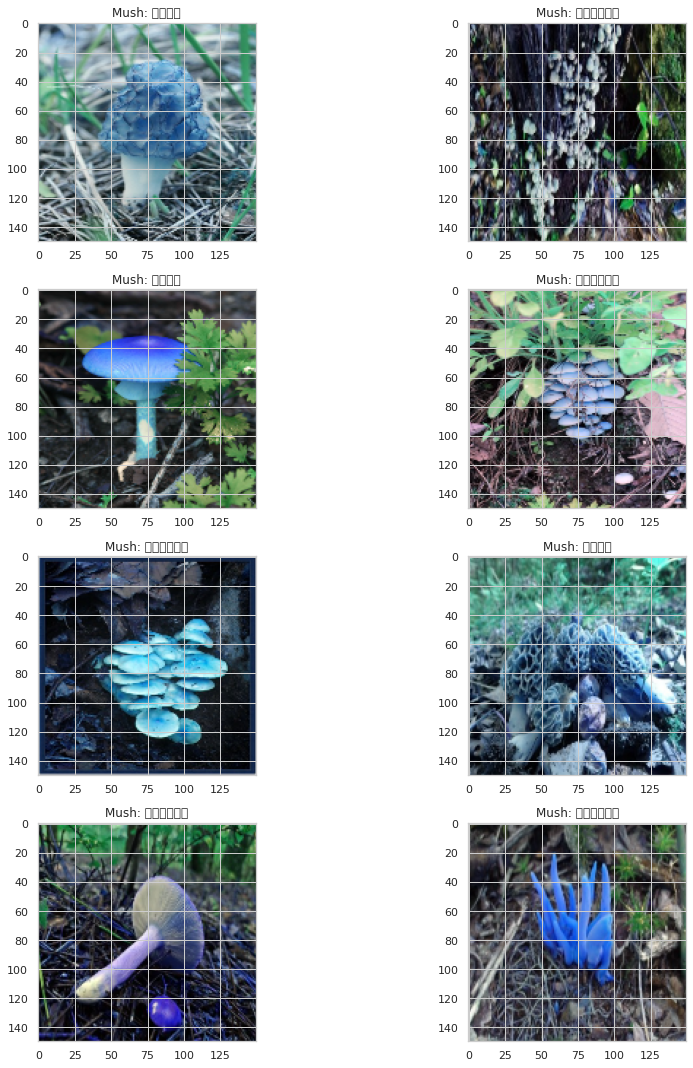

time: 2.36 s (started: 2021-03-04 01:47:05 +00:00)


In [32]:
# 랜덤으로 뽑은 이미지
fig, ax = plt.subplots(4, 2)
fig.set_size_inches(15, 15)
for i in range(4):
  for j in range(2):
    l = rn.randint(0,len(Z)) #
    ax[i,j].imshow(X[l])
    ax[i,j].set_title('Mush: '+Z[l])

plt.tight_layout()

In [33]:
# ONE - HOT ENCODING
le = LabelEncoder()
Y = le.fit_transform(Z) # fit 하고 transform(정규화) 해줌
Y = to_categorical(Y,12) # to_categorical : one-hot encoding해주는 함수
X = np.array(X)
X = X/255 # 0~255 픽셀값을 바꿔주는거???

time: 413 ms (started: 2021-03-04 01:47:07 +00:00)


In [34]:
# Train data와 Test data 나누기
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=42)

time: 283 ms (started: 2021-03-04 01:47:07 +00:00)


In [35]:
# 랜덤 시드 설정
np.random.seed(42) #한번 발생한 난수를 기억하게 해줌
rn.seed(42)
tf.random.set_seed(42)

time: 3.96 ms (started: 2021-03-04 01:47:08 +00:00)


In [36]:
# CNN으로 modeling
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3))) #padding : 아웃풋의 크기를 일정하게 유지
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(12, activation = "softmax"))

time: 76.9 ms (started: 2021-03-04 01:47:08 +00:00)


In [37]:
batch_size=128
epochs=70

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

time: 2.4 ms (started: 2021-03-04 01:47:08 +00:00)


In [38]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

time: 255 ms (started: 2021-03-04 01:47:08 +00:00)


In [39]:
model.compile(optimizer=Adam(lr=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

time: 14.2 ms (started: 2021-03-04 01:47:08 +00:00)


In [40]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 96)       

In [41]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/70
9/9 [==============================] - 39s 676ms/step - loss: 72.1117 - accuracy: 0.1108 - val_loss: 2.4754 - val_accuracy: 0.1206
Epoch 2/70
9/9 [==============================] - 5s 604ms/step - loss: 4.4492 - accuracy: 0.1215 - val_loss: 2.4780 - val_accuracy: 0.1226
Epoch 3/70
9/9 [==============================] - 5s 559ms/step - loss: 2.4724 - accuracy: 0.1078 - val_loss: 2.4813 - val_accuracy: 0.1148
Epoch 4/70
9/9 [==============================] - 5s 559ms/step - loss: 2.4689 - accuracy: 0.1134 - val_loss: 2.4858 - val_accuracy: 0.0895
Epoch 5/70
9/9 [==============================] - 5s 603ms/step - loss: 2.4486 - accuracy: 0.1277 - val_loss: 2.4869 - val_accuracy: 0.0895
Epoch 6/70
9/9 [==============================] - 5s 558ms/step - loss: 2.4789 - accuracy: 0.1040 - val_loss: 2.4758 - val_accuracy: 0.0895
Epoch 7/70
9/9 [==============================] - 5s 559ms/step - loss: 2.4640 - accuracy: 0.1075 - val_loss: 2.4758 - val_accuracy: 0.0895
Epoch 8/70
9/9 [==

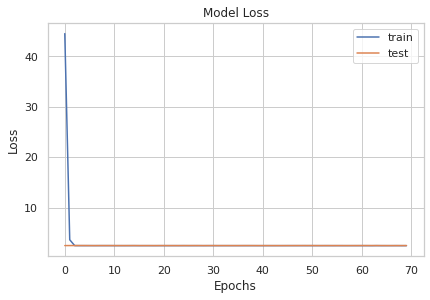

time: 232 ms (started: 2021-03-04 01:54:07 +00:00)


In [42]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

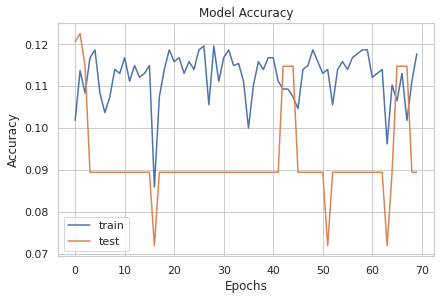

time: 247 ms (started: 2021-03-04 01:54:07 +00:00)


In [43]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

In [44]:
# 모델 저장
model.save("mushroom_model.h5")

time: 198 ms (started: 2021-03-04 01:54:07 +00:00)


**전이 모델 사용**

In [45]:
# VGG16 대신에 써도 되는것들
'''
mobilenet = MobileNet(weights=None, input_shape=None, include_top=True)

resnet50 = ResNet50(weights=None, input_shape=None, include_top=True)

xception = Xcecption(weights=None, input_shape=None, include_top=True)
'''

'\nmobilenet = MobileNet(weights=None, input_shape=None, include_top=True)\n\nresnet50 = ResNet50(weights=None, input_shape=None, include_top=True)\n\nxception = Xcecption(weights=None, input_shape=None, include_top=True)\n'

time: 3 ms (started: 2021-03-04 01:54:07 +00:00)


In [46]:
conv_base = VGG16(weights='imagenet',
              input_shape=(150,150,3), include_top=False) #include_top :분류기층을 따로 사용할건지 여부

time: 271 ms (started: 2021-03-04 01:54:07 +00:00)


In [47]:
from tensorflow.keras.optimizers import RMSprop

def build_model_with_pretrained(conv_base):
  model = Sequential()
  model.add(conv_base)
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dense(12, activation='softmax'))
  

  model.compile(loss='categorical_crossentropy',
                optimizer=RMSprop(learning_rate=0.01),
                metrics=['accuracy'])
  
  return model

time: 5.73 ms (started: 2021-03-04 01:54:08 +00:00)


In [48]:
model = build_model_with_pretrained(conv_base)
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 12)                3084      
Total params: 16,815,180
Trainable params: 16,815,180
Non-trainable params: 0
_________________________________________________________________
time: 77.7 ms (started: 2021-03-04 01:54:08 +00:00)


In [49]:
# 가중치 수
print(len(model.trainable_weights))

30
time: 2.32 ms (started: 2021-03-04 01:54:08 +00:00)


In [50]:
# 가중치 학습을 막기 위해서 동결시킴
conv_base.trainable = False
print(len(model.trainable_weights))

4
time: 2.71 ms (started: 2021-03-04 01:54:08 +00:00)


**모델 컴파일**

In [51]:
model.compile(loss='categorical_crossentropy',
                optimizer=Adam(learning_rate=0.01),
                metrics=['accuracy'])

time: 9.6 ms (started: 2021-03-04 01:54:08 +00:00)


In [52]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=20,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

time: 261 ms (started: 2021-03-04 01:54:08 +00:00)


In [53]:
batch_size=128
epochs=70

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

time: 2.11 ms (started: 2021-03-04 01:54:08 +00:00)


In [54]:
History2 = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/70
9/9 [==============================] - 26s 2s/step - loss: 22.7572 - accuracy: 0.1196 - val_loss: 14.3684 - val_accuracy: 0.2218
Epoch 2/70
9/9 [==============================] - 7s 727ms/step - loss: 9.3557 - accuracy: 0.1999 - val_loss: 2.2438 - val_accuracy: 0.2802
Epoch 3/70
9/9 [==============================] - 7s 726ms/step - loss: 2.2327 - accuracy: 0.2563 - val_loss: 2.1387 - val_accuracy: 0.2412
Epoch 4/70
9/9 [==============================] - 7s 778ms/step - loss: 2.0040 - accuracy: 0.2483 - val_loss: 1.7302 - val_accuracy: 0.3346
Epoch 5/70
9/9 [==============================] - 7s 723ms/step - loss: 1.6740 - accuracy: 0.3863 - val_loss: 1.5272 - val_accuracy: 0.4241
Epoch 6/70
9/9 [==============================] - 7s 718ms/step - loss: 1.4097 - accuracy: 0.4875 - val_loss: 1.3883 - val_accuracy: 0.5195
Epoch 7/70
9/9 [==============================] - 7s 788ms/step - loss: 1.2523 - accuracy: 0.5490 - val_loss: 1.2107 - val_accuracy: 0.5837
Epoch 8/70
9/9 [====

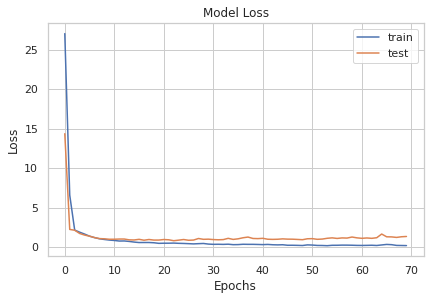

time: 230 ms (started: 2021-03-04 02:02:14 +00:00)


In [55]:
plt.plot(History2.history['loss'])
plt.plot(History2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

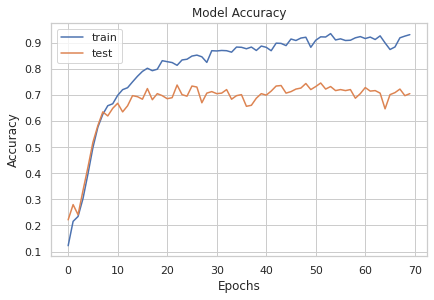

time: 234 ms (started: 2021-03-04 02:02:14 +00:00)


In [56]:
plt.plot(History2.history['accuracy'])
plt.plot(History2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()